<a href="https://colab.research.google.com/github/Luiz-Octavioo/Climate-Python/blob/main/analise_dados_climaticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **O que é Python, para que serve e por que aprender?**

<img src=https://miro.medium.com/max/1400/1*ycIMlwgwicqlO6PcFRA-Iw.png>


1. **Python** é uma linguagem de **programação de alto nível** — ou **High Level Language** —, dinâmica, interpretada, modular, multiplataforma e orientada a objetos — uma forma específica de organizar softwares onde, a grosso modo, os procedimentos estão submetidos às classes, o que possibilita maior controle e estabilidade de códigos para projetos de grandes proporções.


2. Por ser uma linguagem de sintaxe relativamente simples e de fácil compreensão, ganhou popularidade entre profissionais da indústria tecnológica que não são especificamente programadores, como engenheiros, matemáticos, cientistas de dados, pesquisadores e outros.


3. Um de seus maiores atrativos é possuir um grande número de bibliotecas, nativas e de terceiros, tornando-a muito difundida e útil em uma grande variedade de setores dentro de desenvolvimento web, e também em áreas como análise de dados, machine learning e IA.

O Python é uma linguagem de programação orientada à objetos, o que significa que ela possui recursos que dão suporte à programação orientada à objetos (POO). ... Na programação orientada à objetos o foco é na criação de objetos que contem tanto os dados quanto as funcionalidades.

# **Mudanças Climáticas**

Mudança climática se refere a transformações de longo prazo nos padrões de temperatura e clima. Essas alterações podem ser naturais, mas desde o século 18 as atividades humanas têm sido a principal causa das mudanças climáticas, principalmente por causa da queima de combustíveis fósseis (como carvão, petróleo e gás), que produzem gases que retêm o calor.

<right><img src='https://www.ipcc.ch/site/assets/uploads/2018/02/FigTS_TFE.8-1-977x1024.jpg' width='55%' height='15%'></right> 

**Imagem do relatório do IPCC** 


## Vamos carregar as bibliotecas necessárias para a análise dos dados

In [ ]:
# Importar bibliotecas
import pandas as pd # Abrir planilhas, analise de dados
import seaborn as sns # Graficos estatitiscos
import matplotlib.pyplot as plt # Graficos
import numpy as np # Computação cientifica

# Redefinir parametros do matplotlib
# import matplotlib
# matplotlib.rcParams.update(matplotlib.rcParamsDefault)

### Vamos carregar o banco de dados a partir de um site. 

### Dados de emissão de CO2

In [ ]:
df = pd.read_csv('https://datahub.io/core/co2-ppm/r/co2-mm-mlo.csv').drop(['Decimal Date', 
    'Interpolated', 'Trend', 'Number of Days'], axis=1) # Dados de CO2

In [ ]:
# Vamos verificar as informações referentes a cada coluna do nosso dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     727 non-null    object 
 1   Average  727 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.5+ KB


In [ ]:
# Transformando a coluna Date em um objeto do tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df

,Date,Average
0,1958-03-01,315.71
1,1958-04-01,317.45
2,1958-05-01,317.50
3,1958-06-01,-99.99
4,1958-07-01,315.86
...,...,...
722,2018-05-01,411.24
723,2018-06-01,410.79
724,2018-07-01,408.71
725,2018-08-01,406.99


In [ ]:
# Agora vamos definir a coluna Date como índice do nosso dataset
df.set_index('Date', inplace=True)

In [ ]:
# Vamos verificar como ficou o nosso dataset
df

,Average
Date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,-99.99
1958-07-01,315.86
...,...
2018-05-01,411.24
2018-06-01,410.79
2018-07-01,408.71


### Observe que os dados contem o valor -99.99 como valor para dados faltantes

In [ ]:
# Verificar quantas vezes aparece o -99.99
df[df['Average'] == -99.99].count()

Average    7
dtype: int64

In [ ]:
# Vamos substituir o -99.99 por NaN
df['Average'].replace(-99.99, np.nan, inplace=True)

In [ ]:
# Preenchendo os valores faltantes com a média de cada ano
df['Average'].fillna(df.groupby(df.index.year)['Average'].transform('mean'), inplace=True)

In [ ]:
# Vamos verificar se ainda temos valores NaN
df.isna().sum()

Average    0
dtype: int64

#### Como os dados agora estao limpos, vamos fazer uma analise exploratoria

In [ ]:
 # Análise exploratória dos dados
df.describe()

,Average
count,727.000000
mean,353.632628
std,27.449769
min,313.200000
25%,328.555000
50%,351.310000
75%,375.700000
max,411.240000


In [ ]:
# Vamos criar colunas para o ano, mês para facilitar a análise
df['year'] = df.index.year
df['month'] = df.index.month

In [ ]:
# Agora podemos verificar a média de CO2 por ano e mês
df.groupby(['year'])['Average'].mean().to_frame()

# ou 

df.resample('YS')['Average'].mean().to_frame()

,Average
Date,
1958-01-01,315.331250
1959-01-01,315.974167
1960-01-01,316.907500
1961-01-01,317.637500
1962-01-01,318.450833
...,...
2014-01-01,398.647500
2015-01-01,400.834167
2016-01-01,404.239167


In [ ]:
# Vamos verificar a média de CO2 por mês
df.groupby(['month'])['Average'].mean().to_frame()

,Average
month,
1,353.745667
2,354.488574
3,354.714991
4,355.931235
5,356.573115
6,355.968545
7,354.506393
8,352.492295
9,350.926230


In [ ]:
#  Podemos selecionar algumas estatísticas para a analise
df.groupby(['year'])['Average'].agg(['mean', 'median', 'min', 'max', 'var', 'std'])

,mean,median,min,max,var,std
year,,,,,,
1958,315.331250,315.33125,313.20,317.50,2.084565,1.443802
1959,315.974167,316.00000,313.26,318.29,2.648281,1.627354
1960,316.907500,316.70000,313.83,320.03,4.170911,2.042281
1961,317.637500,317.35500,314.80,320.58,3.219348,1.794254
1962,318.450833,318.25000,315.42,321.01,3.412063,1.847177
...,...,...,...,...,...,...
2014,398.647500,398.46000,395.38,401.78,4.422039,2.102864
2015,400.834167,400.79500,397.63,403.96,3.930045,1.982434
2016,404.239167,404.26500,401.05,407.72,4.907717,2.215337


### Vamos plotar os nossos dados

#### Para isso vamos utilizar a biblioteca matplotlib

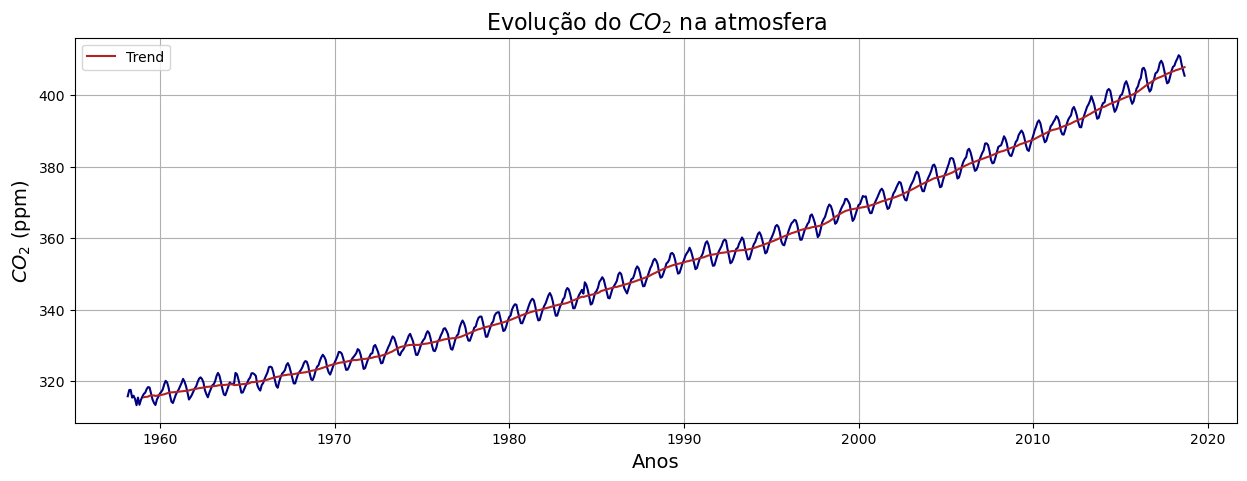

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df.index, df['Average'], color='navy')
# Calcular a média móvel (12 meses)
df['Average_rolling'] = df['Average'].rolling(12).mean()
ax.plot(df.index, df['Average_rolling'], color='firebrick', label='Trend')
ax.set_title(r'Evolução do $CO_2$ na atmosfera', fontsize=16)
ax.set_xlabel('Anos', fontsize=14)
ax.set_ylabel(r'$CO_2$ (ppm)', fontsize=14)
ax.grid(True)
ax.legend()
# plt.show()

# salvando o gráfico
# fig.savefig('co2_media_movel.png', dpi=600, bbox_inches='tight')

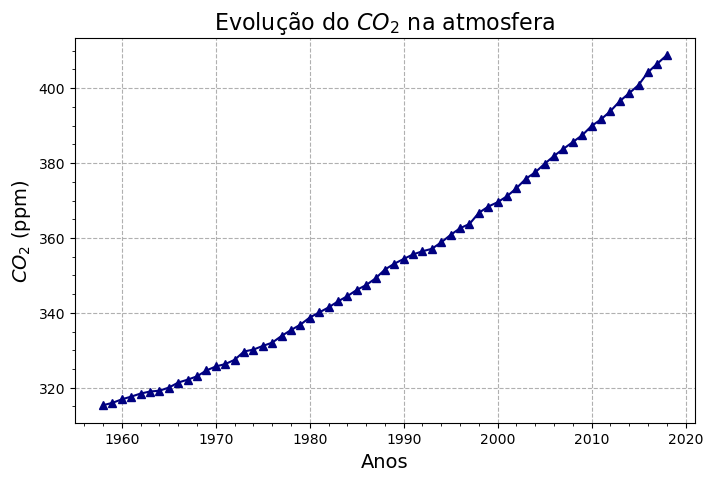

In [ ]:
# Vamos plotar a série temporal de CO2 por ano
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(df.groupby(['year'])['Average'].mean(), color='navy', marker='^')
ax.set_title(r'Evolução do $CO_2$ na atmosfera', fontsize=16)
ax.set_xlabel('Anos', fontsize=14)
ax.set_ylabel(r'$CO_2$ (ppm)', fontsize=14)
ax.grid(True, linestyle='--')
ax.minorticks_on()

Text(0, 0.5, 'CO2 (ppm)')

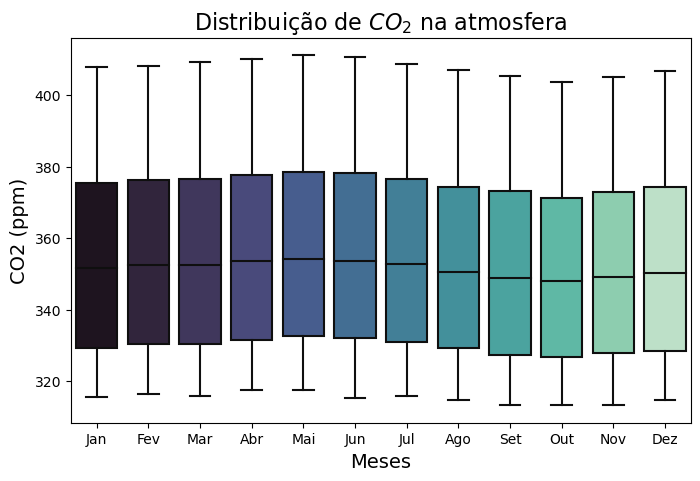

In [ ]:
# Plotar um boxplot para verificar a distribuição dos dados
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(x='month', y='Average', data=df, ax=ax, palette='mako')
ax.set_title(r'Distribuição de $CO_2$ na atmosfera', fontsize=16)
ax.set_xlabel('Meses', fontsize=14)
# Definindo o nome dos meses
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
ax.set_ylabel('CO2 (ppm)', fontsize=14)

Text(0, 0.5, 'CO2 (ppm)')

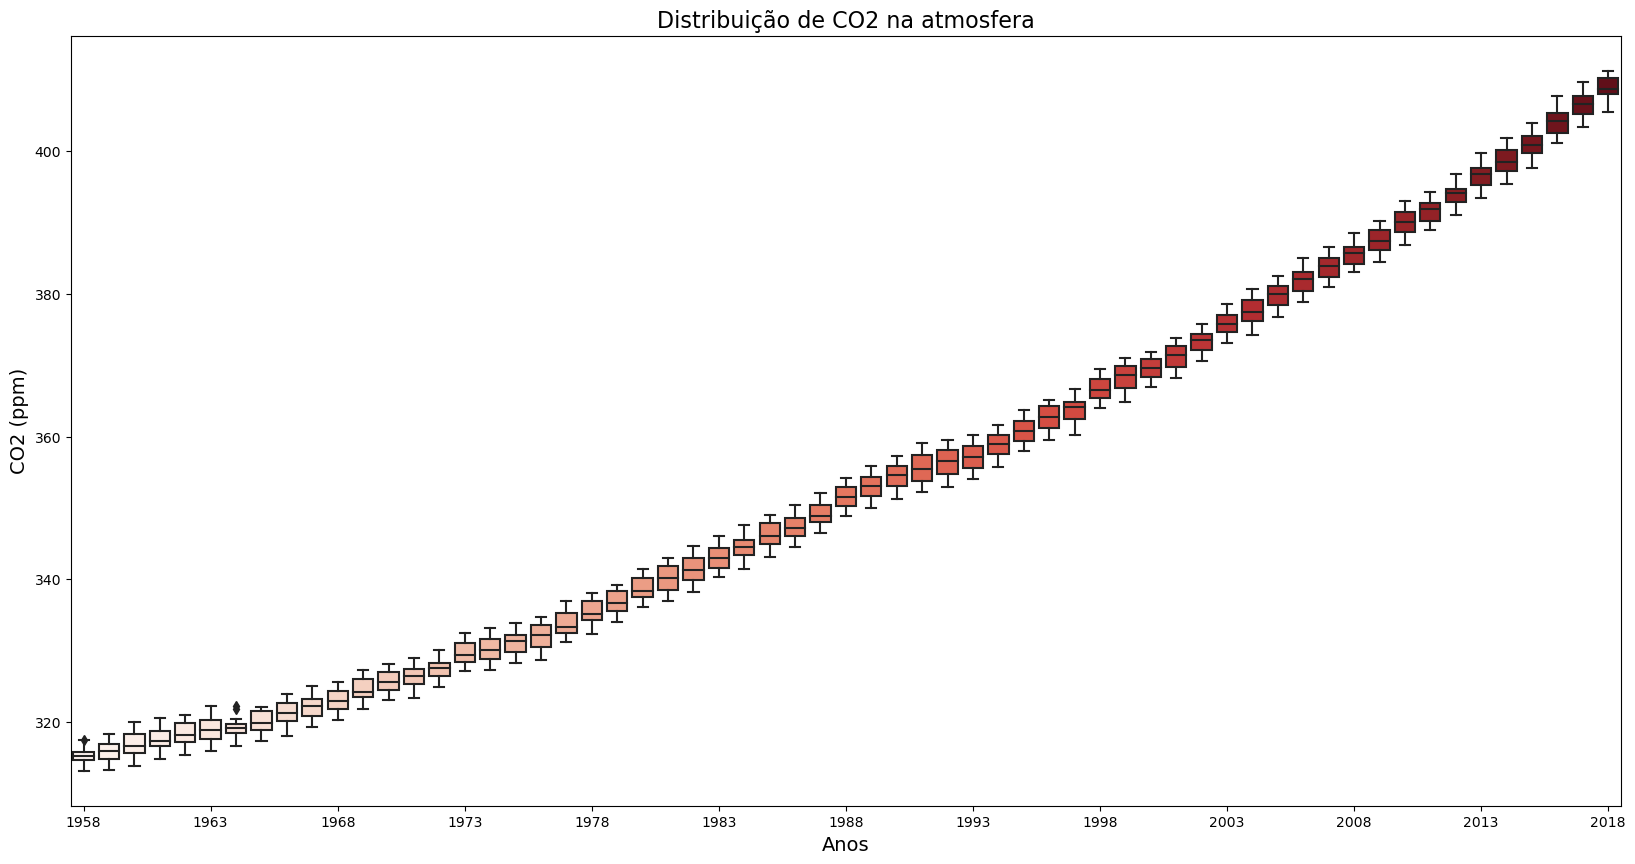

In [ ]:
# Distribuição de CO2 na atmosfera por ano
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x='year', y='Average', data=df, ax=ax, palette='Reds')
ax.set_title('Distribuição de CO2 na atmosfera', fontsize=16)
ax.set_xlabel('Anos', fontsize=14)

# Mudar a frequência do eixo x
ax.set_xticks(ax.get_xticks()[::5])
ax.set_xticklabels([x for x in range(1958, 2019, 5)], rotation=0)
ax.set_ylabel('CO2 (ppm)', fontsize=14)

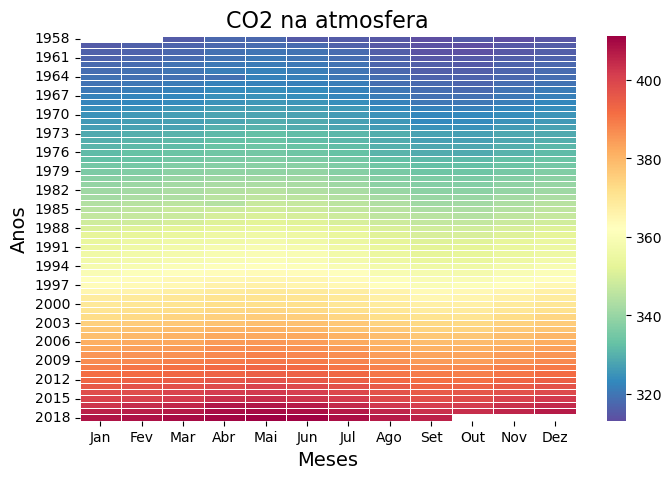

In [ ]:
# Plotar um Heatmap
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(df.groupby(['year', 'month'])['Average'].mean().unstack(), ax=ax, cmap='Spectral_r', linewidths=0.5, linecolor='white')
ax.set_title('CO2 na atmosfera', fontsize=16)
ax.set_xlabel('Meses', fontsize=14)
ax.set_ylabel('Anos', fontsize=14)
# Definindo o nome dos meses
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']);

### Dados de Temperatura global

#### Anomalias de temperatura média global média em graus Celsius em relação a um período base. Período base do GISTEMP: 1951-1980. Período base GCAG: média do século XX.

In [ ]:
temp = pd.read_csv('https://datahub.io/core/global-temp/r/monthly.csv') # Dados de temperatura

In [ ]:
temp

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292
...,...,...,...
3283,GISTEMP,1880-03-06,-0.1800
3284,GCAG,1880-02-06,-0.1229
3285,GISTEMP,1880-02-06,-0.2100
3286,GCAG,1880-01-06,0.0009


In [ ]:
# Reverter a ordem das linhas
temp = temp.iloc[::-1].reset_index(drop=True)

In [ ]:
# Visualizar as 5 primeiras linhas
temp

,Source,Date,Mean
0,GISTEMP,1880-01-06,-0.3000
1,GCAG,1880-01-06,0.0009
2,GISTEMP,1880-02-06,-0.2100
3,GCAG,1880-02-06,-0.1229
4,GISTEMP,1880-03-06,-0.1800
...,...,...,...
3283,GCAG,2016-10-06,0.7292
3284,GISTEMP,2016-11-06,0.9300
3285,GCAG,2016-11-06,0.7504
3286,GISTEMP,2016-12-06,0.8100


In [ ]:
# Separar por fonte
temp_GCAG = temp.loc[temp['Source'] == 'GCAG'].reset_index(drop=True)
temp_GISTEMP = temp.loc[temp['Source'] == 'GISTEMP'].reset_index(drop=True)

temp_df = pd.DataFrame()
# Calcular a média entre as fontes
temp_df['Ensemble_mean'] = (temp_GCAG['Mean'] + temp_GISTEMP['Mean']) / 2

In [ ]:
# Inserir a coluna de data
temp_df['Date'] = pd.to_datetime(temp_GCAG['Date'])

In [ ]:
# Definir a coluna Date como índice
temp_df.set_index('Date', inplace=True)

In [ ]:
# Estatísticas descritivas
temp_df.describe()

,Ensemble_mean
count,1644.000000
mean,0.036588
std,0.333718
min,-0.684800
25%,-0.210275
50%,-0.036200
75%,0.238513
max,1.271050


In [ ]:
# Vamos criar colunas para o ano, mês para facilitar a análise
temp_df['year'] = temp_df.index.year
temp_df['month'] = temp_df.index.month

## Vamos visualizar os dados de temperatura

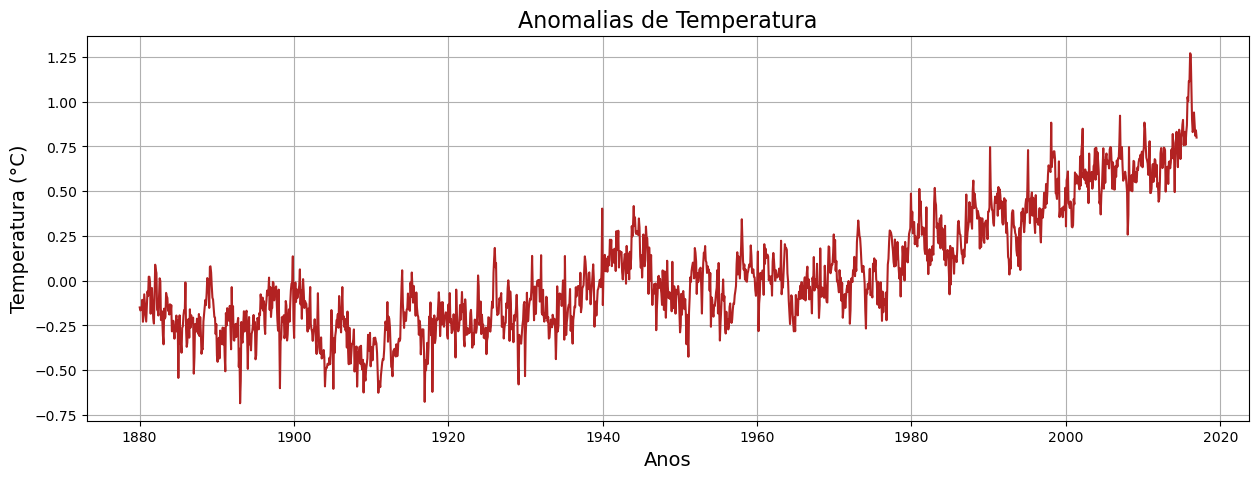

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(temp_df.index, temp_df['Ensemble_mean'], color='firebrick')
ax.set_title(r'Anomalias de Temperatura', fontsize=16)
ax.set_xlabel('Anos', fontsize=14)
ax.set_ylabel(r'Temperatura (°C)', fontsize=14)
ax.grid(True)
plt.show()

In [ ]:
# Vamos transformar os dados para a escala anaual (media)
temp_df_anual = temp_df.resample('1Y').mean()

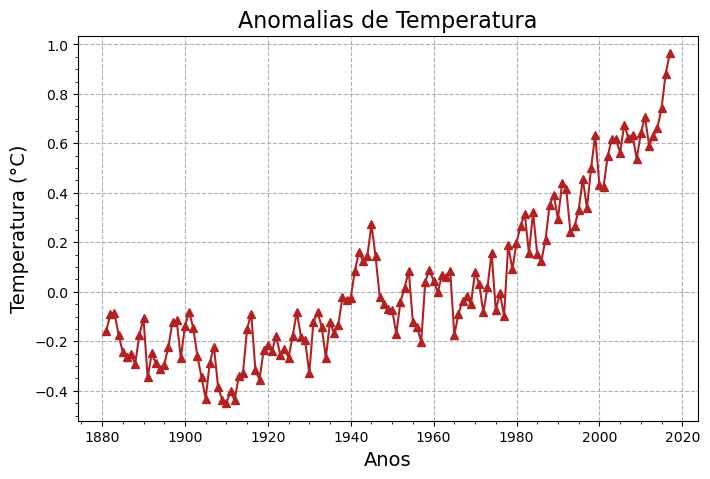

In [ ]:
# Vamos plotar a série temporal de temperatura por ano
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(temp_df_anual['Ensemble_mean'], color='firebrick', marker='^')
ax.set_title(r'Anomalias de Temperatura', fontsize=16)
ax.set_xlabel('Anos', fontsize=14)
ax.set_ylabel(r'Temperatura (°C)', fontsize=14)
ax.grid(True, linestyle='--')
ax.minorticks_on()

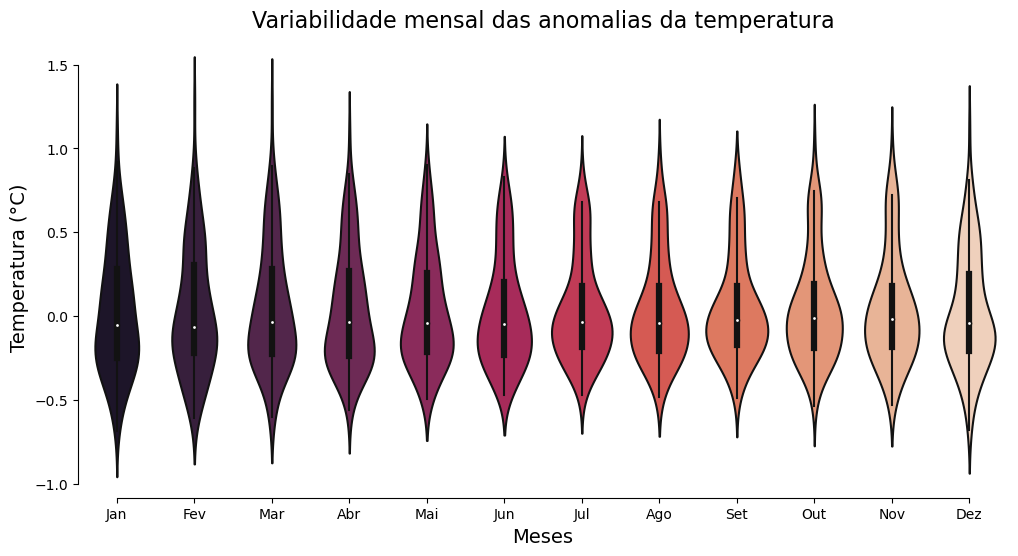

In [ ]:
# Plotar um boxplot para verificar a distribuição dos dados
fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(x='month', y='Ensemble_mean', data=temp_df, ax=ax, palette='rocket')
ax.set_title(r'Variabilidade mensal das anomalias da temperatura', fontsize=16)
ax.set_xlabel('Meses', fontsize=14)
# Definindo o nome dos meses
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
ax.set_ylabel('Temperatura (°C)', fontsize=14)



# Remover os eixos
sns.despine(trim=True)

## Agora, vamos combinar os dois bancos de dados

In [ ]:
# Primeiro devemos igualar o tamanho dos datasets
df_co2 = df.loc['1958-03-01':'2016-12-01'].reset_index(drop=True)
df_temp = temp_df.loc['1958-03-01':'2016-12-06'].reset_index(drop=True)

In [ ]:
df_temp['Time'] = pd.date_range(start='1958-03-01', end='2016-12-06', freq='MS')

In [ ]:
# Vamos renomear a coluna Average para CO2
df_co2.rename(columns={'Average': 'CO2'}, inplace=True)
# Vamos renomear a coluna Ensemble_mean para Temp
df_temp.rename(columns={'Ensemble_mean': 'Temp'}, inplace=True)

In [ ]:
# Vamos concatenar os datasets
df_final = pd.concat([df_co2, df_temp[['Temp', 'Time']]], axis=1)

In [ ]:
df_final.drop('Average_rolling', axis=1, inplace=True)

In [ ]:
# df_final.to_excel('dados_CO2_Global.xlsx', index=False)

In [ ]:
# Definir a coluna Time como índice
df_final.set_index('Time', inplace=True)

## Vamos fazer relações entre os dados de emissão de CO2 e temperatura

Vamos importar algumas bibliotecas que nos auxiliarão na análise dos dados

In [ ]:
# Testes estatísticos
from scipy import stats

# regressão linear
from scipy.stats import linregress

# Regressão linear sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
# Instalar biblioteca para analise de tendencias
!pip install pymannkendall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importar a biblioteca
import pymannkendall as mk

In [ ]:
# Correlação
cor, p = stats.pearsonr(df_final['CO2'], df_final['Temp'])
# Condição
if p < 0.05:
    print(f'Correlação significativa {cor:.2f}')
    print(f'valor-p: {p:.2f}')
else:
    print(f'Correlação não significativa {cor:.2f}')	
    print(f'p-value: {p:.2f}')

Correlação significativa 0.90
valor-p: 0.00


In [ ]:
# Vamos fazer as analises por regresão linear 
# Regressão linear
X = df_final['CO2'].values.reshape(-1, 1)
y = df_final['Temp'].values.reshape(-1, 1)

# Criar o modelo
model = LinearRegression()
model.fit(X, y)

# Verficar as métricas
print(f'Coeficiente: {model.coef_[0][0]:.2f}')
print(f'Intercepto: {model.intercept_[0]:.2f}')
print(f'R2: {model.score(X, y):.2f}')

Coeficiente: 0.01
Intercepto: -3.24
R2: 0.81


Text(0.05, 0.9, 'R² = 0.81')

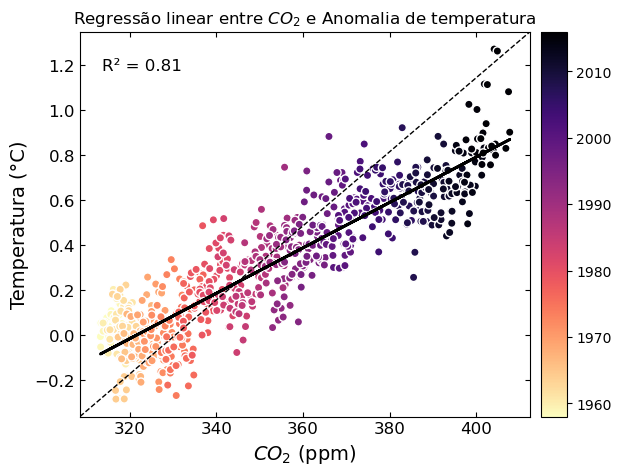

In [ ]:
# Plotar o gráfico de dispersão 
fig, ax = plt.subplots(figsize=(7, 5))
cs = ax.scatter(df_final['CO2'], df_final['Temp'], c=df_final['year'], cmap='magma_r', edgecolor='white')
# Plotar a regressão linear
ax.plot(X, model.predict(X), color='black', linewidth=2)

# Plot colorbar
cbar = fig.colorbar(cs, ax=ax, pad=0.02, aspect=15, orientation='vertical')
plt.title(r'Regressão linear entre $CO_2$ e Anomalia de temperatura', fontsize=12)
plt.xlabel(r'$CO_2$ (ppm)', fontsize=14)
plt.ylabel('Temperatura (°C)', fontsize=14)

# Ticks params
ax.tick_params(axis='both', which='major', labelsize=12, direction='in', right=True, top=True)

# Adicionar um linha de 45°
ax.plot([0, 2.5], [0, 2.5], color='black', linestyle='--', linewidth=1, transform=ax.transAxes)

# Mostrar o R2 no gráfico
plt.text(0.05, 0.90, f'R² = {model.score(X, y):.2f}', fontsize=12, transform=ax.transAxes)

# Vamos verificar a distribuição dos dados (X e Y) e sua densidade de pontos

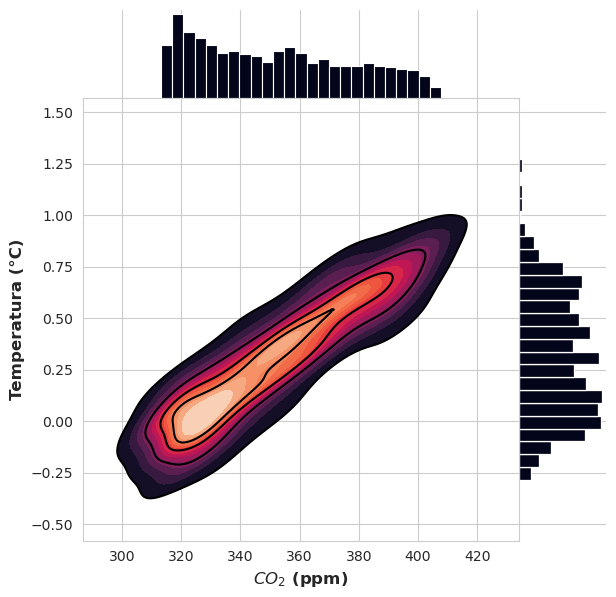

In [ ]:
with sns.axes_style("whitegrid"):
  # Criar o grid para o plot
  g = sns.JointGrid(data=df_final, x="CO2", y="Temp", space=0)

  # Plot de densidade preenchido
  g.plot_joint(sns.kdeplot,
              fill=True,
              thresh=0.05, levels=15, 
              cmap="rocket", color='k')
  # plot de densidade com os niveis
  g.plot_joint(sns.kdeplot,
            fill=False,
            thresh=0.05, levels=5, color='k')
  
  # Plot dos histogramas nas margens do grid 
  g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25, fill=True)

  g.set_axis_labels('$CO_2$ (ppm)', 'Temperatura (°C)', fontsize=12, fontweight='bold')

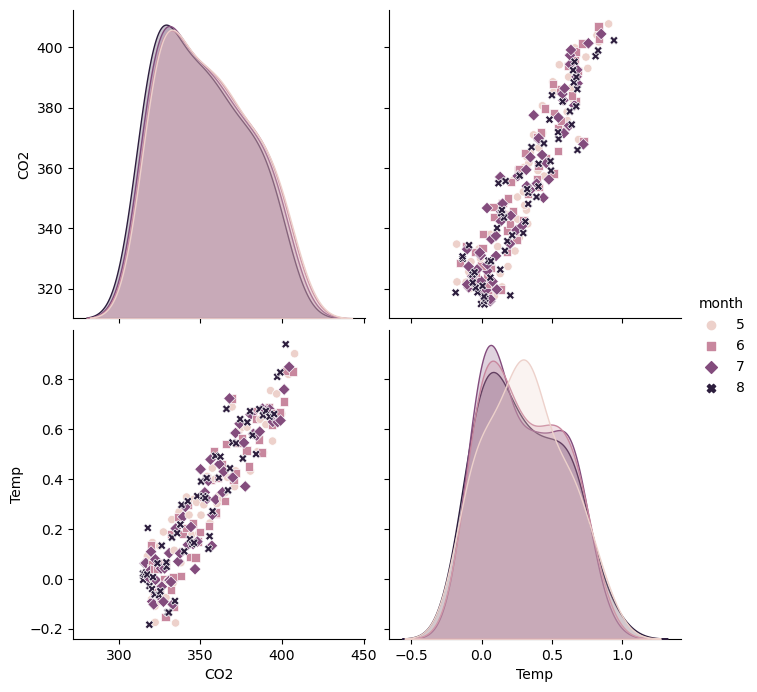

In [ ]:
filter_months = [5,6,7,8]
df_final_filter = df_final[df_final['month'].isin(filter_months)][['CO2', 'Temp', 'month']]
sns.pairplot(df_final_filter, hue='month', height=3.5, markers=["o", "s", "D","X"], kind='scatter', diag_kind='kde') 
# kind{‘scatter’, ‘kde’, ‘hist’, ‘reg’}
# diag_kind{‘auto’, ‘hist’, ‘kde’, None}

### Análise de tendências 

In [ ]:
# Analise de tendencia por regressão linear
# Criar o modelo
print('Regressão linear')
print('===========================================================')
X = df_final['CO2'].reset_index().index             #.year.values.reshape(-1, 1)
y = df_final['CO2']

# Calcular a regressão linear
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

# Verficar as métricas
print(f'Coeficiente: {slope:.2f}')
print(f'Intercepto: {intercept:.2f}')
print(f'R2: {r_value**2*100:.2f}')
print(f'p-value: {p_value:.2f}')

# predição
trend = slope * X + intercept


print('===========================================================')
print('\n')
print('Calculando a tendência pelo método Modificado de Mann-Kendall e Theil-Sen')

print('===========================================================')
# Calculando a tendência método de mann-kendall e Theil-Sen
res = mk.hamed_rao_modification_test(df_final['CO2'])
print(f'Tendência de Mann-Kendall: {res.trend}')
print(f'slope: {res.slope:.2f}')
print(f'intercept: {res.intercept:.2f}')
print(f'p-value: {res.p:.2f}')

trend_line_mk = np.arange(len(df_final['CO2'])) * res.slope + res.intercept

Regressão linear
Coeficiente: 0.13
Intercepto: 307.23
R2: 97.82
p-value: 0.00


Calculando a tendência pelo método Modificado de Mann-Kendall e Theil-Sen
Tendência de Mann-Kendall: increasing
slope: 0.13
intercept: 304.97
p-value: 0.00


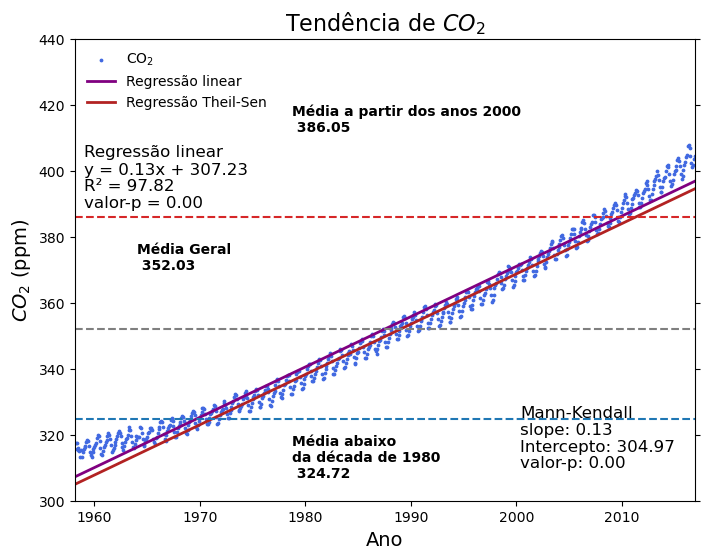

In [ ]:
# plotar o gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Plotar os dados
ax.scatter(df_final.index, y, color='royalblue', s=3, label='CO$_2$')
# Plotar a tendência
ax.plot(df_final.index, trend, color='purple', linewidth=2, label='Regressão linear')
# Inserir a equação da reta
ax.text(df_final.index[10], 399, f'Regressão linear\ny = {slope:.2f}x + {intercept:.2f}', fontsize=12)
# Inserir o R2
ax.text(df_final.index[10], 394, f'R² = {r_value**2*100:.2f}', fontsize=12)
# Inserir o p-value
ax.text(df_final.index[10], 389, f'valor-p = {p_value:.2f}', fontsize=12)



# Mann Kendall
# # Plotar a linha de tendência pelo teste de Mann-Kendall
ax.plot(df_final.index, trend_line_mk,
         label='Regressão Theil-Sen',
         color='firebrick', linewidth=2)

# Inseir os valores pelo teste de Mann-Kendall
ax.text(df_final.index[-200], 320, f'Mann-Kendall\nslope: {res.slope:.2f}', fontsize=12)
ax.text(df_final.index[-200], 310, f'valor-p: {res.p:.2f}', fontsize=12)
ax.text(df_final.index[-200], 315, f'Intercepto: {res.intercept:.2f}', fontsize=12)


# ax.plot(X, df_final['CO2'], color='royalblue', linewidth=2)
plt.title(r'Tendência de $CO_2$', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel(r'$CO_2$ (ppm)', fontsize=14)
# plt.grid(axis='y', color='gray', linestyle=':', linewidth=1)
plt.xlim(df_final.index[0], df_final.index[-1])

# Inserir a linha de média geral
ax.axhline(y.mean(), linestyle='--', color='tab:gray')
# Inserir o valor da média 
ax.text(x=0.1, y=0.5, s=f'Média Geral\n {y.mean():.2f}', transform=ax.transAxes, fontsize=10, fontweight='bold')

# Inserir a linha de média a partir dos anos 2000
media_a2000 = df_final[df_final.index > '2000']['CO2'].mean()
ax.axhline(media_a2000, linestyle='--', color='tab:red')
# Inserir o valor da média 
ax.text(x=0.35, y=0.80, s=f'Média a partir dos anos 2000\n {media_a2000:.2f}', transform=ax.transAxes, fontsize=10, fontweight='bold')

# Inserir a linha de média abaixo dos anos 2000
media_ab1980 = df_final[df_final.index < '1980']['CO2'].mean()
ax.axhline(media_ab1980, linestyle='--', color='tab:blue')
# Inserir o valor da média 
ax.text(x=0.35, y=0.05, s=f'Média abaixo \nda década de 1980\n {media_ab1980:.2f}', transform=ax.transAxes, fontsize=10, fontweight='bold')

# Parametros dos ticks
ax.tick_params(axis='y', right=True)

# Definir os limites do eixo y
ax.set_ylim(300, 440)

# Inserir a legendas
ax.legend(loc='upper left', fontsize=10, frameon=False)

# Salvar a figura
plt.savefig('tendencia_co2.png', dpi=600, bbox_inches='tight')


In [ ]:
# Analise de tendencia por regressão linear
# Criar o modelo
print('Regressão linear')
print('===========================================================')
df_anual = df_final['CO2'].resample('Y').mean()
model = LinearRegression()
X = df_anual.reset_index().index.values.reshape(-1, 1)  # .year.values.reshape(-1, 1)
y = df_anual.values.reshape(-1, 1)
model.fit(X, y)


# Verficar as métricas
print(f'Coeficiente: {model.coef_[0][0]:.2f}')
print(f'Intercepto: {model.intercept_[0]:.2f}')
print(f'R2: {model.score(X, y):.2f}')

# Calculando a tendência
trend = model.predict(X)
trend = pd.Series(trend.reshape(-1), index=df_anual.index)
print('===========================================================')
print('\n')
print('Calculando a tendência pelo método Modificado de Mann-Kendall e Theil-Sen')

print('===========================================================')
# Calculando a tendência método de mann-kendall e Theil-Sen
res = mk.hamed_rao_modification_test(df_anual)
print(f'Tendência de Mann-Kendall: {res.trend}')
print(f'slope: {res.slope:.2f}')
print(f'p-value: {res.p:.2f}')

trend_line_mk = np.arange(len(df_anual)) * res.slope + res.intercept


Regressão linear
Coeficiente: 1.52
Intercepto: 307.73
R2: 0.98


Calculando a tendência pelo método Modificado de Mann-Kendall e Theil-Sen
Tendência de Mann-Kendall: increasing
slope: 1.52
p-value: 0.00


(300.0, 420.0)

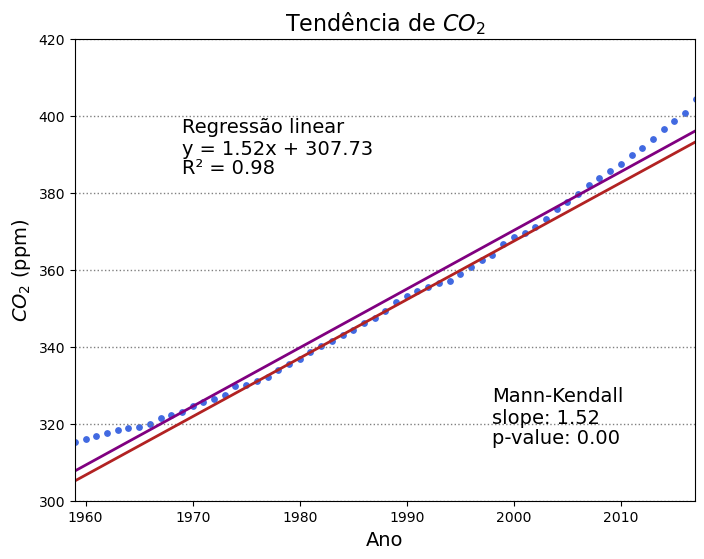

In [ ]:
# plotar o gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Plotar os dados
ax.scatter(df_anual.index, y, color='royalblue', s=15)
# Plotar a tendência
ax.plot(trend, color='purple', linewidth=2)
# Inserir a equação da reta
ax.text(df_anual.index[10], 390,
        f'Regressão linear\ny = {model.coef_[0][0]:.2f}x + {model.intercept_[0]:.2f}', fontsize=14)
# Inserir o R2
ax.text(df_anual.index[10], 385, f'R² = {model.score(X, y):.2f}', fontsize=14)


# Mann Kendall
# # Plotar a linha de tendência pelo teste de Mann-Kendall
ax.plot(df_anual.index, trend_line_mk,
        label=f'Tendência: {res.slope:.2f}\nValor-p: {res.p:.2f}', color='firebrick', linewidth=2)

# Inseir os valores pelo teste de Mann-Kendall
ax.text(df_anual.index[-20], 320,
        f'Mann-Kendall\nslope: {res.slope:.2f}', fontsize=14)
ax.text(df_anual.index[-20], 315, f'p-value: {res.p:.2f}', fontsize=14)

# ax.plot(X, df_final['CO2'], color='royalblue', linewidth=2)
ax.set_title(r'Tendência de $CO_2$', fontsize=16)
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel(r'$CO_2$ (ppm)', fontsize=14)
ax.grid(axis='y', color='gray', linestyle=':', linewidth=1)
ax.set_xlim(df_anual.index[0], df_final.index[-1])
ax.set_ylim(300, 420)


## Bonus

Como extra, vamos fazer uma rápida previsão (Forecast) considerando as emissoes de CO2 utilizando um algoritmo para construir modelos automatizados de previsão para dados de séries temporais.

O Algoritmo **Prophet**

O Prophet é um procedimento para prever dados de séries temporais com base em um modelo aditivo em que as tendências não lineares são ajustadas à sazonalidade anual, semanal e diária, além dos efeitos de feriados. Funciona melhor com séries temporais com fortes efeitos sazonais e várias temporadas de dados históricos. O Prophet é robusto a dados ausentes, mudanças na tendência e normalmente lida bem com valores discrepantes.


**Dito isso, Mão na massa!!**

Vamos instalar a biblioteca

In [ ]:
!pip install prophet -q

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [ ]:
# Importar a biblioteca do Facebook's Prophet
from prophet import Prophet

# Criar um novo dataframe para criarmos um modelo Prophet
t_prophet = pd.DataFrame()
t_prophet['ds'] = df_final.index
t_prophet['y'] = df_final['CO2'].values

# Instanciar o modelo e ajustar os dados (Método similar ao Sklearn)
m = Prophet()
m.fit(t_prophet)

# Gere dataframe futuro contendo previsões (estamos fazendo isso por 100 anos no futuro)
future = m.make_future_dataframe(freq='m', periods=100*12)
forecast = m.predict(future)

# Plotar os resultados da previsão
# m.plot(forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkp0nirqx/q1exq45b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkp0nirqx/qh6hkexl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61306', 'data', 'file=/tmp/tmpkp0nirqx/q1exq45b.json', 'init=/tmp/tmpkp0nirqx/qh6hkexl.json', 'output', 'file=/tmp/tmpkp0nirqx/prophet_modelh5fo91tk/prophet_model-20230430005659.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:56:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:57:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

# Plotly


O Plotly é uma biblioteca Python de visualização de dados que permite criar gráficos interativos e personalizados. Ele suporta uma ampla variedade de gráficos, como gráficos de linhas, barras, dispersão, caixas, superfícies, mapas e muito mais. É possível criar gráficos 3D e animações com apenas algumas linhas de código. Além disso, o Plotly oferece recursos avançados de personalização, como ajustes de cores, fontes e estilos.



Uma das grandes vantagens do Plotly é a capacidade de criar visualizações interativas. Com ele, você pode adicionar recursos como zoom, pan e seleção de região aos seus gráficos. Isso permite que você explore os dados de forma mais dinâmica e interativa. Além disso, é possível integrar o Plotly em outros frameworks de visualização de dados, como o Dash, para criar visualizações ainda mais avançadas.

Para usar o Plotly em um notebook Python, você precisa primeiro instalá-lo. Isso pode ser feito facilmente usando o gerenciador de pacotes pip. Basta digitar o seguinte comando em um terminal



In [ ]:
!pip install plotly -q

In [ ]:
# Agora vamos importar o plotly
import plotly.express as px

### Vamos novamente visualizar o nosso banco de dados para plotar usando a biblioteca **`Plotly`**

In [ ]:
df

,Average,year,month,Average_rolling
Date,,,,
1958-03-01,315.71000,1958,3,NaN
1958-04-01,317.45000,1958,4,NaN
1958-05-01,317.50000,1958,5,NaN
1958-06-01,315.33125,1958,6,NaN
1958-07-01,315.86000,1958,7,NaN
...,...,...,...,...
2018-05-01,411.24000,2018,5,407.269167
2018-06-01,410.79000,2018,6,407.428333
2018-07-01,408.71000,2018,7,407.560833


In [ ]:
# Plotar os dados de CO2
fig = px.line(x=df.index, y=df['Average'], 
              color_discrete_sequence=['Blue'])

# adicionar a tendencia por média movel
fig.add_trace(px.line(x=df.index, y=df['Average_rolling'], 
                      color_discrete_sequence=['firebrick']).data[0])

# parâmetros de formatação do gráfico
fig.update_layout(title="Curva de Keeling",
                  xaxis_title="Anos", yaxis_title="CO2 (ppmv)",
                  plot_bgcolor='white', paper_bgcolor='white',
                  width=1000, height=500, 
                  title_font=dict(size=22))

# Add gridlines
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                        label="1m",
                        step="month",
                        stepmode="backward"),
                dict(count=6,
                        label="6m",
                        step="month",
                        stepmode="backward"),
                dict(count=1,
                        label="YTD",
                        step="year",
                        stepmode="todate"),
                dict(count=1,
                        label="1y",
                        step="year",
                        stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ), 
        type="date"
    )
)

fig.show()